<a href="https://colab.research.google.com/github/restrepo/ComputationalMethods/blob/master/material/gaussian_fit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Gaussian fit

Based on the data colected with this google form: [https://bit.ly/guesbookpages](https://bit.ly/guesbookpages) for the guesses in the number of pages for a book

$$
f(x)=a\exp\left[ -\frac{(x-\mu)^2}{2\sigma^2} \right]
$$
where $a$ is the height of the gaussian, $\mu$ is the mean (expected value), and $\sigma$ es la varianze

In [1]:
%pylab inline
import matplotlib.pyplot as plt
import pandas as pd
from scipy.optimize import curve_fit

def gaussian(x,a,μ,σ):
    return a*exp(-(x-μ)**2/(2*σ**2))

Populating the interactive namespace from numpy and matplotlib


In [3]:
df=pd.read_csv('https://docs.google.com/spreadsheets/d/e/2PACX-1vTu_XE2dAiTcjHTfbaVKt7xEl_GnNeF_VYFsIBi5uM-gqBlBRfNHso-X1z3lxV7IW2f9UYKmZkSOYv-/pub?output=csv')
#Convert to integer
df['Guess']=df['Guess'].str.replace(',','').astype(int)
# Configure binned data
bins=range(0,1500,100)

In [17]:
(df[((df.Guess>=0) & (df.Guess<100))].shape[0],
 df[((df.Guess>=100) & (df.Guess<200))].shape[0],
 df[((df.Guess>=200) & (df.Guess<300))].shape[0],
 df[((df.Guess>=300) & (df.Guess<400))].shape[0],
 df[((df.Guess>=400) & (df.Guess<500))].shape[0])

(0, 1, 0, 3, 8)

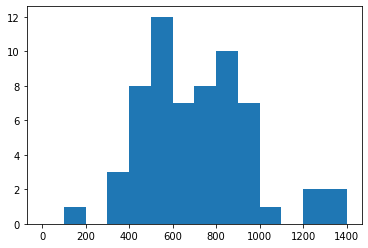

In [4]:
y,x,p=plt.hist(df['Guess'],bins=bins)

In [5]:
x

array([   0,  100,  200,  300,  400,  500,  600,  700,  800,  900, 1000,
       1100, 1200, 1300, 1400])

Fitted values are: a=10.2, μ=726.2, σ=237.7


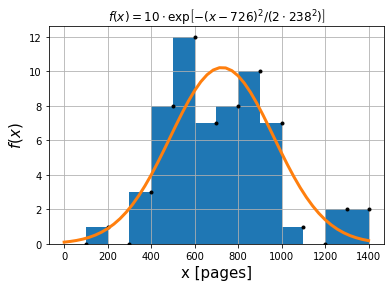

In [6]:
#Plot histogram and extract binned data
y,x,p=plt.hist(df['Guess'],bins=bins)
#Chose the right-side of the bar
x=x[1:]
#show the choosen points
plt.plot(x,y,'k.')

#Gaussiang fit
#initial point `p0` to start the fit
a=1
μ=500
σ=100

fit=curve_fit(gaussian,x,y,p0=[a,μ,σ])[0]
print('Fitted values are: a={:.1f}, μ={:.1f}, σ={:.1f}'.format(fit[0],fit[1],fit[2]))
x=np.linspace(0,1400)
plt.plot(x,gaussian(x,*fit),lw=3)

plt.grid()
plt.xlabel('x [pages]',size=15)
plt.ylabel('$f(x)$',size=15)
plt.title( r'$f(x)=%.0f\cdot \exp\left[ -{(x-%.0f)^2}/{(2\cdot %.0f^2)} \right]$' %(fit[0],fit[1],fit[2]))
plt.savefig('gaussian.png')

### Conclusion
The number of pages is $726\pm 238$.

Another way to obtain the bins:

In [ ]:
xx=df.Guess.value_counts(bins=bins)

In [ ]:
df=pd.DataFrame( {'X':xx.index.right,'Y':xx.values} )
df=df.sort_values('X').reset_index(drop=True)

In [ ]:
df

,X,Y
0,100.0,0
1,200.0,1
2,300.0,0
3,400.0,5
4,500.0,9
5,600.0,11
6,700.0,7
7,800.0,8
8,900.0,13
9,1000.0,3
